Total no of generations required for convergence =  13


Plot Result:


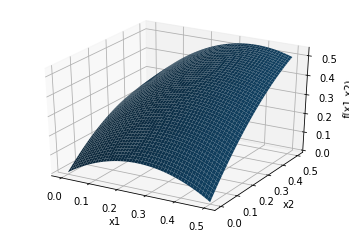



Final Output Solution/population in Decimals :
x1 =  0.4032258064516129
x2 =  0.3225806451612903


Final Output Solution/population in Binary :


[[1, 1, 0, 0, 1, 1, 0, 1, 0, 0],
 [1, 1, 0, 0, 1, 1, 0, 1, 0, 0],
 [1, 1, 0, 0, 1, 1, 0, 1, 0, 0],
 [1, 1, 0, 0, 1, 1, 0, 1, 0, 0],
 [1, 1, 0, 0, 1, 1, 0, 1, 0, 0],
 [1, 1, 1, 0, 1, 1, 0, 1, 0, 0]]

In [42]:
import numpy as ny
ny.random.seed(300)
n_population=6
n_bits=10
population=[ny.random.randint(0,2,n_bits).tolist() for _ in range(n_population)]

#Decoded and Converted values
def objective(b):
    X_1=int("".join(list(map(str,b[:5]))),2)
    x1=(0.5/31)*X_1
    X_2=int("".join(list(map(str,b[5:]))),2)
    x2=(0.5/31)*X_2

#Function Defination    
    func=x1+x2-2*x1*x1-x2*x2+x1*x2
    return 1/(1+func*func)

#Block for Single Point Crossover 
def crossover(pr1,pr2):
    pt=ny.random.randint(1,len(pr1)-2)
    ch1=pr1[:pt]+pr2[pt:]
    ch2=pr2[:pt]+pr1[pt:]
    return [ch1,ch2]

#Block for Mutation
def mutation(bit,r_mut):
    for i in range(len(bit)):
        if ny.random.random_sample()<r_mut:
            bit[i]=1-bit[i]

for generation in range(13):
    
    score=[objective(c) for c in population]
    sum_score=sum(score)
    prob=[x/sum_score for x in score]
    cumm_prob=[sum(prob[:i+1]) for i in range(len(prob))]
    random_prob=[ny.random.random_sample() for _ in range(len(population))]
    #print(cumm_prob)
    #print(random_prob)

    selection_index=[]
    for x in random_prob:
        for i in range(len(cumm_prob)):
            if cumm_prob[i]>=x:
                selection_index.append(i)
                break
    #print(selection_index)

    parents=[population[i] for i in selection_index]
    #print(parents)

    #Next Generation
    children=[]
    for i in range(0,len(population),2):
        pr1,pr2=parents[i],parents[i+1]
        for c in crossover(pr1,pr2):
            mutation(c,0.0)
            children.append(c)
    population=children
    #print("f(x) = ",objective(population[0]))
    if objective(population[0])==1:
        break

print("Total no of generations required for convergence = ",generation+1)
print("\n")
print("Plot Result:")

from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
x=ny.outer(ny.linspace(0,0.5,1000),ny.ones(1000))
y=x.copy().T
z=x+y-2*x*x-y*y+x*y
fig=plt.figure()
ax=plt.axes(projection='3d')
ax.plot_surface(x,y,z)
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_zlabel("f(x1,x2)")
plt.show()

print("\n")
print("Final Output Solution/population in Decimals :")
print("x1 = ",(0.5/31)*int("".join(list(map(str,population[0][:5]))),2))
print("x2 = ",(0.5/31)*int("".join(list(map(str,population[0][5:]))),2))
print("\n")
print("Final Output Solution/population in Binary :")
population
